In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [2]:
def readh5files(file): 
    
    print('DATA FROM FILE:      ',file)
    hf = h5py.File(file, 'r')
  
    t = np.array(hf.get('time'))
    x = np.array(hf.get('x'))
    y = np.array(hf.get('y'))
    z = np.array(hf.get('z'))
    rho = np.array(hf.get('rho'))
    vx = np.array(hf.get('vx'))
    vy = np.array(hf.get('vy'))
    vz = np.array(hf.get('vz'))
    Bx = np.array(hf.get('Bx'))
    By = np.array(hf.get('By'))
    Bz = np.array(hf.get('Bz'))
      
    return [t,x,y,z,Bx, By, Bz, vx, vy, vz,rho]

def readspectra(arx):
    
    print('DATA FROM FILE:      ',arx)
    hf = h5py.File(arx, 'r')
    
    t = np.array(hf.get('time'))
    ekin = np.array(hf.get('ekin'))
    emag = np.array(hf.get('emag'))
    k = np.array(hf.get('k'))
    
    print('Time = ', t)
    
    return [t, k, ekin, emag]

def readstresses(arx):

    print('DATA FROM FILE:      ',arx)

    with h5py.File(arx, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())
        for i in a_group_key:
            print(i)

        Fmean = np.array(f.get('Fmean'))
        Rmean = np.array(f.get('Rmean'))
        Mmean = np.array(f.get('Mmean'))
        time = np.array(f.get('time'))
        rho = np.array(f.get('rhomean'))
        
        M = np.array([Mmean[0,0],Mmean[0,1],Mmean[0,2], Mmean[1,1], Mmean[1,2], Mmean[2,2]])
        R = np.array([Rmean[0,0],Rmean[0,1],Rmean[0,2], Rmean[1,1], Rmean[1,2], Rmean[2,2]])
        F = np.array([Fmean[0,1], Fmean[0,2], Fmean[1,2]])
        
        eT = 0.5*rho*(R[0]+R[3]+R[5])
        f.close()

        print('Time           :',time,' ms')

    return [M, R, F, eT, rho]

def energies(arx):
    
    print('DATA FROM FILE:      ',arx)

    with h5py.File(arx, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())
        for i in a_group_key:
            print(i)
    
        Emag = np.array(f.get('Emag'))
        Emagx = np.array(f.get('Emagx'))
        Emagy = np.array(f.get('Emagy'))
        Emagz = np.array(f.get('Emagz'))
    
        Ekin = np.array(f.get('Ekin'))
        Ekinx = np.array(f.get('Ekinx'))
        Ekiny = np.array(f.get('Ekiny'))
        Ekinz = np.array(f.get('Ekinz'))
    
        vxcut = np.array(f.get('vxcut'))
        ycut = np.array(f.get('ycut'))
        
        eners = np.array([Emag, Emagx, Emagy, Emagz, Ekin, Ekinx, Ekiny, Ekinz])
    
    return eners, vxcut, ycut

def energies_bis(arx):
    
    print('DATA FROM FILE:      ',arx)

    with h5py.File(arx, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())
        for i in a_group_key:
            print(i)
    
        Emag = np.array(f.get('Emag'))
        Emagx = np.array(f.get('Emagx'))
        Emagy = np.array(f.get('Emagy'))
        Emagz = np.array(f.get('Emagz'))
    
        Ekin = np.array(f.get('Ekin'))
        Ekinx = np.array(f.get('Ekinx'))
        Ekiny = np.array(f.get('Ekiny'))
        Ekinz = np.array(f.get('Ekinz'))
    
        vxcut = np.array(f.get('vxcut'))
        
        eners = np.array([Emag, Emagx, Emagy, Emagz, Ekin, Ekinx, Ekiny, Ekinz])
    
    return eners, vxcut

In [3]:
#path_energies = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/mean_quants/'
path_ult = 'res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/'
path_ult2 = 'res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/'
path_ult3 = 'res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/'

t = np.linspace(0,40,201)

energ_ult = np.zeros((len(t),8))
vx_ult = np.zeros((len(t),512))
energ_ult2 = np.zeros((len(t),8))
vx_ult2 = np.zeros((len(t),512))
energ_ult3 = np.zeros((len(t),8))
vx_ult3 = np.zeros((len(t),512))

print('Dimensions of the grid : 512x512x512')
print('LOW MAGNETIC FIELD: b_0x = 3e-4')
for i,tt in enumerate(t):
    arx = format(int(10*tt), "04")
    energ_ult[i], vx_ult[i,:], ycutult = energies(path_ult+'energies_vxcut_KHI-'+str(arx)+'.h5')
    print('Time           : ',t[i])
print('MEDIUM MAGNETIC FIELD: b_0x = 1e-3')
for i,tt in enumerate(t):
    arx = format(int(10*tt), "04")
    energ_ult2[i], vx_ult2[i,:], ycutult2 = energies(path_ult2+'energies_vxcut_KHI-'+str(arx)+'.h5')
    print('Time           : ',t[i])
print('HIGH MAGNETIC FIELD: b_0x = 3e-2')
for i,tt in enumerate(t):
    arx = format(int(10*tt), "04")
    energ_ult3[i], vx_ult3[i,:], ycutult3 = energies(path_ult3+'energies_vxcut_KHI-'+str(arx)+'.h5')
    print('Time           : ',t[i])    

Dimensions of the grid : 512x512x512
LOW MAGNETIC FIELD: b_0x = 3e-4
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0000.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  0.0
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0002.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  0.2
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0004.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 

Time           :  13.8
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0140.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  14.0
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0142.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  14.200000000000001
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0144.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
E

Time           :  27.6
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0278.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  27.8
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0280.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  28.0
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/mean_quants/energies_vxcut_KHI-0282.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Eki

Time           :  1.6
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0018.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  1.8
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0020.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  2.0
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0022.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz


Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  16.0
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0162.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  16.2
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0164.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  16.400000000000002
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0166.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Em

Time           :  30.200000000000003
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0304.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  30.400000000000002
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0306.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  30.6
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/mean_quants/energies_vxcut_KHI-0308.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']

Time           :  3.4000000000000004
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0036.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  3.6
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0038.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  3.8000000000000003
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0040.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>

Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  17.8
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0180.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  18.0
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0182.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  18.2
DATA FROM FILE:       res_512_512_512/CVP--bx

Time           :  30.8
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0310.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  31.0
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0312.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
Ekinx
Ekiny
Ekinz
Emag
Emagx
Emagy
Emagz
rhomean
time
vmean
vxcut
ycut
Time           :  31.200000000000003
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/mean_quants/energies_vxcut_KHI-0314.h5
Keys: <KeysViewHDF5 ['Bmean', 'Ekin', 'Ekinx', 'Ekiny', 'Ekinz', 'Emag', 'Emagx', 'Emagy', 'Emagz', 'rhomean', 'time', 'vmean', 'vxcut', 'ycut']>
Bmean
Ekin
E

DATA FROM FILE:       CVP--bx3e-4--256--rndom/KHI-00000020.h5
DATA FROM FILE:       CVP--bx3e-4--256--rndom/KHI-00000050.h5
DATA FROM FILE:       CVP--bx3e-4--256--rndom/KHI-00000100.h5
DATA FROM FILE:       CVP--bx3e-4--256--rndom/KHI-00000300.h5


<ipython-input-61-706430ca3afc>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colorm = ax[0].pcolor(x,y,vx[0,:,:,0].T,vmin =-0.5,vmax=0.5,cmap="RdBu")
<ipython-input-61-706430ca3afc>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colorm = ax[1].pcolor(x,y,vx[1,:,:,0].T,vmin =-0.5,vmax=0.5,cmap="RdBu")
<ipython-input-61-706430ca3afc>:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Ei

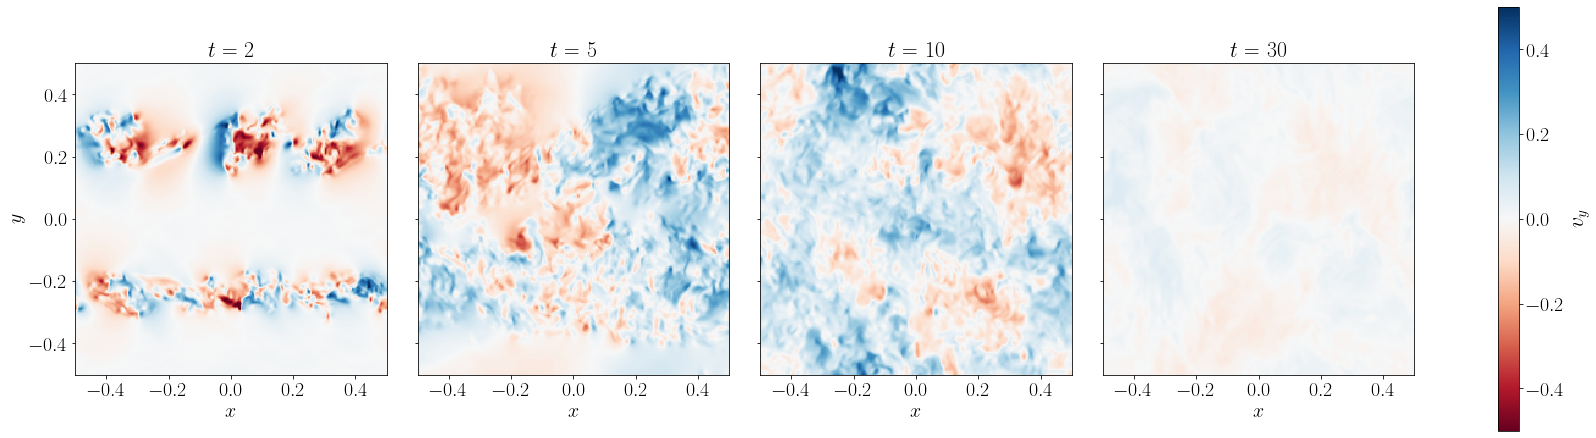

In [61]:
t = []
vy = []
files = ['20','50','100','300']

for i in files:
    arx = format(int(i), "08")
    variab = readh5files('CVP--bx3e-4--256--rndom/KHI-'+str(arx)+'.h5')
    t.append(variab[0])
    x = variab[1]
    y = variab[2]
    z = variab[3]
    vy.append(variab[8])
    
vx = np.array(vy)
x = np.linspace(-0.5,0.5,256)
y = np.linspace(-0.5,0.5,256)
z = np.linspace(-0.5,0.5,256)

fig, ax = plt.subplots(1,4,figsize = (30,12),sharey='all')
plt.subplots_adjust(hspace = 0.5) 
plt.subplots_adjust(wspace = 0.1) 

for i in range(0,4):
    ax[i].tick_params(axis='y',labelsize = 20)
    ax[i].tick_params(axis='x',labelsize = 20)
    ax[i].set_aspect('equal')


colorm = ax[0].pcolor(x,y,vx[0,:,:,0].T,vmin =-0.5,vmax=0.5,cmap="RdBu")
ax[0].set_title('$t = 2$', fontsize = 22)
ax[0].set_xlabel(r'$x$', fontsize = 20)
ax[0].set_ylabel(r'$y$', fontsize = 20)


#cbar = fig.colorbar(colorm,ax = ax[0], orientation='vertical', shrink = 0.4)
#cbar.ax.tick_params(labelsize=15)
#cbar.ax.yaxis.get_offset_text().set(size=15)
#cbar.set_label(r'$v_x$', fontsize = 16)

colorm = ax[1].pcolor(x,y,vx[1,:,:,0].T,vmin =-0.5,vmax=0.5,cmap="RdBu")
ax[1].set_title('$t$ = 5', fontsize = 22)
ax[1].set_xlabel(r'$x$', fontsize = 20)
#ax[1].set_ylabel(r'$y$', fontsize = 18)
#cbar = fig.colorbar(colorm,ax = ax[1], orientation='vertical', shrink = 0.4)
#cbar.ax.tick_params(labelsize=15)
#cbar.ax.yaxis.get_offset_text().set(size=15)
#cbar.set_label(r'$v_x$', fontsize = 16)

colorm = ax[2].pcolor(x,y,vx[2,:,:,0].T,vmin =-0.5,vmax=0.5,cmap="RdBu")
ax[2].set_title('$t$ = 10', fontsize = 22)
ax[2].set_xlabel(r'$x$', fontsize = 20)
#ax[2].set_ylabel(r'$y$', fontsize = 18)
#cbar = fig.colorbar(colorm,ax = ax[2], orientation='vertical', shrink = 0.4)
#cbar.ax.tick_params(labelsize=15)
#cbar.ax.yaxis.get_offset_text().set(size=15)
#cbar.set_label(r'$v_x$', fontsize = 16)

colorm = ax[3].pcolor(x,y,vx[3,:,:,0].T,vmin =-0.5,vmax=0.5,cmap="RdBu")
ax[3].set_title('$t$ = 30', fontsize = 22)
ax[3].set_xlabel(r'$x$', fontsize = 20)
#ax[3].set_ylabel(r'$y$', fontsize = 18)


cbar = fig.colorbar(colorm,ax = ax, orientation='vertical',shrink = 0.65)
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.get_offset_text().set(size=20)
cbar.set_label(r'$v_y$', fontsize = 22)

plt.savefig('/home/miquelmiravet/Desktop/figs_khi/vy-cuts--bx3e-4--256.pdf',bbox_inches = 'tight')


In [93]:
#plots v cut

tt = [0,5, 10, 40]

fig, ax = plt.subplots(2,1,sharex = 'all', sharey = 'all',figsize = (10,12))
for i in range(0,2):
    ax[i].tick_params(axis='y',labelsize = 20)
    ax[i].tick_params(axis='x',labelsize = 20)

plt.subplots_adjust(hspace = 0.1) 
style = ['solid','dotted','dashed','dashdot']

props = dict(boxstyle='square', facecolor='white', alpha=0.5)


for i in range(0,4):
    ax[0].plot(ycutult,vx_ult[tt[i]*5,:],linestyle = style[i], color = 'crimson', linewidth = 1.3, label = r'$t = '+str(tt[i])+'$')
ax[0].set_ylabel(r'$v_x$', fontsize = 20)
#ax[0].set_xlabel('y', fontsize = 16)
ax[0].text(-0.5,-0.15,r'$B_{\rm 0x} = 3\times 10^{-4}$', bbox=props,fontsize = 18)
#ax[0].legend(loc = 'center right', fontsize = 15)

for i in range(0,4):
    ax[1].plot(ycutult2,vx_ult2[tt[i]*5,:],linestyle = style[i], color = 'crimson', linewidth = 1.3, label = r'$t = '+str(tt[i])+'$')
ax[1].set_ylabel(r'$v_x$', fontsize = 20)
ax[1].set_xlabel('y', fontsize = 20)
ax[1].text(-0.5,-0.15,r'$B_{\rm 0x} = 1\times 10^{-3}$', bbox=props,fontsize = 18)
ax[1].legend(bbox_to_anchor = (1.3,1.3), fontsize = 22)
#ax[1].set_xlim([0.23,0.27])

#plt.savefig('/home/miquelmiravet/Desktop/figs_khi/vxcut--512.pdf',bbox_inches = 'tight')



In [95]:
t = np.array([1,5,10,20,40])

ekin1 = np.zeros((len(t), int(512/2+1)))
emag1 = np.zeros((len(t), int(512/2+1)))
ekin2 = np.zeros((len(t), int(512/2+1)))
emag2 = np.zeros((len(t), int(512/2+1)))

for i in range(0,len(t)):
    arx = format(10*t[i], "02")
    time, k512, ekin1[i], emag1[i] = readspectra('res_512_512_512/CVP--bx3e-4--512--rndom/energy_spectra/CVP--energy_spectra--b0x3e-4--512t-'+arx+'.h5')
    time, k512, ekin2[i], emag2[i] = readspectra('res_512_512_512/CVP--bx1e-3--512--rndom/energy_spectra/CVP--energy_spectra--b0x1e-3--512t-'+arx+'.h5')

    
fig, ax = plt.subplots(1,4,sharex = 'all', sharey = 'all', figsize=(32,6))

for i in range(0,4):
    ax[i].tick_params(axis='y',labelsize = 22)
    ax[i].tick_params(axis='x',labelsize = 22)
        
plt.subplots_adjust(wspace = 0.1) 

ax[0].plot(k512[:-1], k512[:-1]**(-5/3), color = 'black', linewidth = '1.5', linestyle = 'dashdot', label = r'$k^{-5/3}$')
ax[0].plot(k512[:-1], emag1[0,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'solid',label = 'KH-H1')
ax[0].plot(k512[:-1], ekin1[0,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'dashed')
ax[0].plot(k512[:-1], emag2[0,:-1], color = 'teal', linewidth = '1.7', linestyle = 'solid', label = 'KH-H2')
ax[0].plot(k512[:-1], ekin2[0,:-1], color = 'teal', linewidth = '1.7', linestyle = 'dashed')
ax[0].set_ylabel(r'$E(k_r)$', fontsize = 24)
ax[0].set_xlabel(r'$k_r$', fontsize = 24)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].text(5,1e-13,r'$t='+str(t[0])+'$', fontsize = 24)

ax[1].plot(k512[:-1], k512[:-1]**(-5/3), color = 'black', linewidth = '1.5', linestyle = 'dashdot', label = r'$k^{-5/3}$')
ax[1].plot(k512[:-1], emag1[2,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'solid',label = 'KH-H1')
ax[1].plot(k512[:-1], ekin1[2,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'dashed')
ax[1].plot(k512[:-1], emag2[2,:-1], color = 'teal', linewidth = '1.7', linestyle = 'solid', label = 'KH-H2')
ax[1].plot(k512[:-1], ekin2[2,:-1], color = 'teal', linewidth = '1.7', linestyle = 'dashed')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$k_r$', fontsize = 24)
ax[1].text(5,1e-13,r'$t='+str(t[2])+'$', fontsize = 24)


ax[2].plot(k512[:-1], k512[:-1]**(-5/3), color = 'black', linewidth = '1.5', linestyle = 'dashdot', label = r'$k^{-5/3}$')
ax[2].plot(k512[:-1], emag1[3,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'solid',label = 'KH-H1')
ax[2].plot(k512[:-1], ekin1[3,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'dashed')
ax[2].plot(k512[:-1], emag2[3,:-1], color = 'teal', linewidth = '1.7', linestyle = 'solid', label = 'KH-H2')
ax[2].plot(k512[:-1], ekin2[3,:-1], color = 'teal', linewidth = '1.7', linestyle = 'dashed')
ax[2].set_yscale('log')
ax[2].set_xlabel(r'$k_r$', fontsize = 24)
ax[2].text(5,1e-13,r'$t='+str(t[3])+'$', fontsize = 24)

ax[3].plot(k512[:-1], k512[:-1]**(-5/3), color = 'black', linewidth = '1.5', linestyle = 'dashdot', label = r'$k^{-5/3}$')
ax[3].plot(k512[:-1], emag1[4,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'solid',label = 'KH-H1')
ax[3].plot(k512[:-1], ekin1[4,:-1], color = 'darkred', linewidth = '1.7', linestyle = 'dashed')
ax[3].plot(k512[:-1], emag2[4,:-1], color = 'teal', linewidth = '1.7', linestyle = 'solid', label = 'KH-H2')
ax[3].plot(k512[:-1], ekin2[4,:-1], color = 'teal', linewidth = '1.7', linestyle = 'dashed')
ax[3].set_yscale('log')
ax[3].set_xlabel(r'$k_r$', fontsize = 24)
ax[3].text(5,1e-13,r'$t='+str(t[4])+'$', fontsize = 24)
ax[3].legend(bbox_to_anchor = (1.05,0.65), fontsize = 24)

plt.savefig('/home/miquelmiravet/Desktop/figs_khi/energy_spectra_512.pdf',bbox_inches = 'tight')


DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/energy_spectra/CVP--energy_spectra--b0x3e-4--512t-10.h5
Time =  [1.]
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/energy_spectra/CVP--energy_spectra--b0x1e-3--512t-10.h5
Time =  1
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/energy_spectra/CVP--energy_spectra--b0x3e-4--512t-50.h5
Time =  [5.]
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/energy_spectra/CVP--energy_spectra--b0x1e-3--512t-50.h5
Time =  5
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/energy_spectra/CVP--energy_spectra--b0x3e-4--512t-100.h5
Time =  [10.]
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/energy_spectra/CVP--energy_spectra--b0x1e-3--512t-100.h5
Time =  10
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/energy_spectra/CVP--energy_spectra--b0x3e-4--512t-200.h5
Time =  [20.]
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/energy_spectra/CVP--ener

In [6]:
#plots magnetic energy

fig, ax = plt.subplots(figsize = (10,7))

ax.tick_params(axis='y',labelsize = 14)
ax.tick_params(axis='x',labelsize = 14)


#ax.plot(t[4:],energ_ult[4:,0], linewidth = 1.5, linestyle = 'solid', color = 'mediumslateblue', label = 'KH-H1')
#ax.plot(t[4:],energ_ult2[4:,0], linewidth = 1.5, linestyle = 'solid', color = 'forestgreen', label = 'KH-H2')

ax.plot(t[4:],energ_ult[4:,0], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax.plot(t[4:],energ_ult2[4:,0], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax.plot(t[4:],energ_ult3[4:,0], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')

ax.set_ylabel(r'$E_{\rm mag}$', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
ax.set_xlim([0,20])
#ax.set_yscale('log')
ax.grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax.set_xscale('log')
ax.legend(loc = 'lower right', fontsize = 14)
plt.savefig('/home/miquelmiravet/Desktop/figs_khi/energy_mag_512.pdf',bbox_inches = 'tight')


fig, ax = plt.subplots(1,3,sharey = 'all',figsize = (25,6))
plt.subplots_adjust(wspace = 0.1) 
for i in range(0,3):
    ax[i].tick_params(axis='y',labelsize = 20)
    ax[i].tick_params(axis='x',labelsize = 20)


ax[0].plot(t[4:],energ_ult[4:,1], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[0].plot(t[4:],energ_ult2[4:,1], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax[0].plot(t[4:],energ_ult3[4:,1], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')

ax[0].set_ylabel(r'$e^{\rm mag}_i$', fontsize = 24)
ax[0].set_xlabel('Time', fontsize = 24)
ax[0].set_xlim(left = 1)
ax[0].set_yscale('log')
ax[0].set_ylim([1e-12,1e-2])
ax[0].text(34,1e-9,r'$e^{\rm mag}_x$', fontsize = 26)
#ax[0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].set_xscale('log')
ax[0].legend(loc = 'lower right', fontsize = 18)

ax[1].plot(t[4:],energ_ult[4:,2], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[1].plot(t[4:],energ_ult2[4:,2], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax[1].plot(t[4:],energ_ult3[4:,2], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')
#ax[1].set_ylabel(r'$e^{\rm mag}_{\rm y}$', fontsize = 15)
ax[1].set_xlabel('Time', fontsize = 24)
ax[1].set_yscale('log')
ax[1].set_xlim(left = 1)
ax[1].set_ylim([1e-12,1e-2])
ax[1].text(34,1e-9,r'$e^{\rm mag}_y$', fontsize = 26)
#ax[1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[1].set_xscale('log')
ax[1].legend(loc = 'lower right', fontsize = 18)

ax[2].plot(t[4:],energ_ult[4:,3], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[2].plot(t[4:],energ_ult2[4:,3], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax[2].plot(t[4:],energ_ult3[4:,2], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')

#ax[2].set_ylabel(r'$e^{\rm mag}_{\rm z}$', fontsize = 15)
ax[2].set_xlabel('Time', fontsize = 24)
ax[2].set_yscale('log')
ax[2].set_ylim([1e-12,1e-2])
#ax[2].set_xlim([35,40])
ax[2].set_xlim(left = 1)
ax[2].text(34,1e-9,r'$e^{\rm mag}_z$', fontsize = 26)
#ax[2].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[2].set_xscale('log')
ax[2].legend(loc = 'lower right', fontsize = 18)

#plt.savefig('/home/miquelmiravet/Desktop/figs_khi/energy_mag_comp--512.pdf',bbox_inches = 'tight')


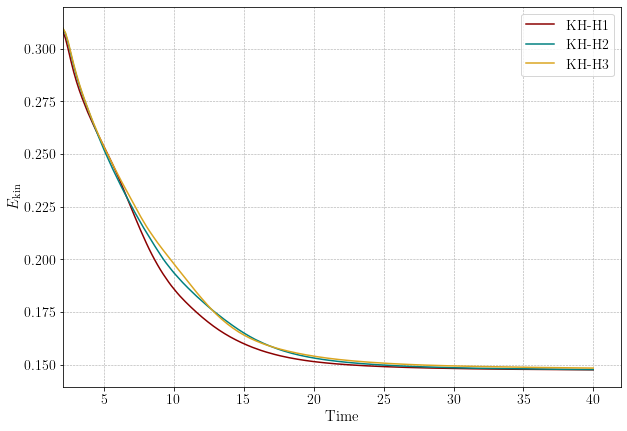

In [7]:
#plots magnetic energy

fig, ax = plt.subplots(figsize = (10,7))

ax.tick_params(axis='y',labelsize = 14)
ax.tick_params(axis='x',labelsize = 14)


ax.plot(t[4:],energ_ult[4:,4], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax.plot(t[4:],energ_ult2[4:,4], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax.plot(t[4:],energ_ult3[4:,4], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')


ax.set_ylabel(r'$E_{\rm kin}$', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
ax.set_xlim(left=2)
#ax.set_yscale('log')
ax.grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax.set_xscale('log')
ax.legend(loc = 'upper right', fontsize = 14)
plt.savefig('/home/miquelmiravet/Desktop/figs_khi/energy_kin_512.pdf',bbox_inches = 'tight')


fig, ax = plt.subplots(1,3,sharey = 'all',figsize = (25,6))
plt.subplots_adjust(wspace = 0.1) 
for i in range(0,3):
    ax[i].tick_params(axis='y',labelsize = 20)
    ax[i].tick_params(axis='x',labelsize = 20)


ax[0].plot(t[4:],energ_ult[4:,5], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[0].plot(t[4:],energ_ult2[4:,5], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax[0].plot(t[4:],energ_ult3[4:,5], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')

ax[0].set_ylabel(r'$e^{\rm kin}_{i}$', fontsize = 24)
ax[0].set_xlabel('Time', fontsize = 24)
ax[0].set_xlim(left = 1)
ax[0].set_yscale('log')
ax[0].set_ylim([1e-7,1])
ax[0].text(34,3e-5,r'$e^{\rm kin}_x$', fontsize = 26)
#ax[0].set_xscale('log')
ax[0].legend(loc = 'lower right', fontsize = 18)

ax[1].plot(t[4:],energ_ult[4:,6], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[1].plot(t[4:],energ_ult2[4:,6], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax[1].plot(t[4:],energ_ult3[4:,6], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')

ax[1].text(34,3e-5,r'$e^{\rm kin}_y$', fontsize = 26)
ax[1].set_xlabel('Time', fontsize = 15)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-7,1])
ax[1].set_xlim(left = 1)
ax[1].legend(loc = 'lower right', fontsize = 18)

ax[2].plot(t[4:],energ_ult[4:,7], linewidth = 1.5, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[2].plot(t[4:],energ_ult2[4:,7], linewidth = 1.5, linestyle = 'solid', color = 'teal', label = 'KH-H2')
ax[2].plot(t[4:],energ_ult3[4:,7], linewidth = 1.5, linestyle = 'solid', color = 'goldenrod', label = 'KH-H3')

ax[2].text(34,3e-5,r'$e^{\rm kin}_z$', fontsize = 26)
ax[2].set_xlabel('Time', fontsize = 24)
ax[2].set_yscale('log')
ax[2].set_ylim([1e-7,1])
ax[2].set_xlim(left = 1)
ax[2].legend(loc = 'lower right', fontsize = 18)

plt.savefig('/home/miquelmiravet/Desktop/figs_khi/energy_kin_comp_512.pdf',bbox_inches = 'tight')


In [5]:
#plots stresses

path_ult = 'res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global'
path_ult2 = 'res_512_512_512/CVP--bx1e-3--512--rndom/stress_tensors_global'
path_ult3 = 'res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global'

M1 = np.zeros((len(t),6))
R1 = np.zeros((len(t),6))
F1 = np.zeros((len(t),3))
eT1 = np.zeros(len(t))
rho1 = np.zeros(len(t))

M2 = np.zeros((len(t),6))
R2 = np.zeros((len(t),6))
F2 = np.zeros((len(t),3))
eT2 = np.zeros(len(t))
rho2 = np.zeros(len(t))

M3 = np.zeros((len(t),6))
R3 = np.zeros((len(t),6))
F3 = np.zeros((len(t),3))
eT3 = np.zeros(len(t))
rho3 = np.zeros(len(t))

for i,tt in enumerate(t):
    arx = format(int(10*tt), "04")
    M1[i], R1[i], F1[i], eT1[i], rho1[i] = readstresses(path_ult+'/stresses_sigma_r0_KHI-'+arx+'.h5')
    M2[i], R2[i], F2[i], eT2[i], rho2[i] = readstresses(path_ult2+'/stresses_sigma_r0_KHI-'+arx+'.h5')
    
for i,tt in enumerate(t):
    arx = format(int(10*tt), "04")
    M3[i], R3[i], F3[i], eT3[i], rho3[i] = readstresses(path_ult3+'/stresses_sigma_r0_KHI-'+arx+'.h5')

    
M1trace = M1[:,0]+M1[:,3]+M1[:,5]
M2trace = M2[:,0]+M2[:,3]+M2[:,5]
M3trace = M3[:,0]+M3[:,3]+M3[:,5]
R1trace = R1[:,0]+R1[:,3]+R1[:,5]
R2trace = R2[:,0]+R2[:,3]+R2[:,5]
R3trace = R3[:,0]+R3[:,3]+R3[:,5]

for i in range(0,6):
    R1[:,i] = R1[:,i]*rho1[:]
    R2[:,i] = R2[:,i]*rho2[:]
    R3[:,i] = R3[:,i]*rho3[:]
    
R1trace[:] = R1trace[:]*rho1[:]
R2trace[:] = R2trace[:]*rho2[:]
R3trace[:] = R3trace[:]*rho3[:]

for i in range(0,3):
    F1[:,i] = abs(F1[:,i]*rho1**(0.5))
    F2[:,i] = abs(F2[:,i]*rho2**(0.5))
    F3[:,i] = abs(F3[:,i]*rho3**(0.5))

DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0000.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [0.]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0000.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [0.]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0002.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sig

Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [14.]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0142.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [14.2]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0142.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [14.2]  ms
DATA FROM FILE:       res_512_512_512/

Time           : [28.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0286.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [28.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0288.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [28.8]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx1e-3--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0288.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9me

Time           : [5.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0058.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [5.8]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0060.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [6.]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0062.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
F

Time           : [35.2]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0354.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [35.4]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0356.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : [35.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-2--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0358.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9me

In [6]:
#plots maxwell, reynolds and faraday

fig, ax = plt.subplots(1,2,figsize = (20,7))

for i in range(0,2):
    ax[i].tick_params(axis='y',labelsize = 14)
    ax[i].tick_params(axis='x',labelsize = 14)

ax[0].plot(t[5:],M1trace[5:], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[0].plot(t[5:],M2trace[5:], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[0].plot(t[5:],M3trace[5:], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[0].set_ylabel(r'$\rm{Tr}(M)$', fontsize = 15)
ax[0].set_xlabel('Time', fontsize = 15)
ax[0].set_yscale('log')
ax[0].set_ylim([1e-11,1])
ax[0].set_xlim([0.5,40])
#ax[0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax.set_xscale('log')
#ax.legend(loc = 'lower right', fontsize = 14)

ax[1].plot(t[5:],R1trace[5:], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[1].plot(t[5:],R2trace[5:], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[1].plot(t[5:],R3trace[5:], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[1].set_ylabel(r'$\rm{Tr}(\rho R)$', fontsize = 15)
ax[1].set_xlabel('Time', fontsize = 15)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-11,1])
ax[1].set_xlim([0.5,40])
#ax[1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
ax[1].legend(bbox_to_anchor = (1.3,0.65), fontsize = 14)

plt.savefig('/home/miquelmiravet/Desktop/figs_khi/trace_maxwell_reynolds_512.pdf',bbox_inches = 'tight')

fig, ax = plt.subplots(3,3,sharex = 'all', sharey = 'none', figsize = (25,18))

for i in range(0,3):
    for j in range(0,3):
        ax[j,i].tick_params(axis='y',labelsize = 20)
        ax[j,i].tick_params(axis='x',labelsize = 20)
    
plt.subplots_adjust(wspace = 0.25) 
plt.subplots_adjust(hspace = 0.15) 

ax[0,0].plot(t[5:],M1[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[0,0].plot(t[5:],M2[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[0,0].plot(t[5:],M3[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[0,0].set_yscale('log')
ax[0,0].set_ylim([1e-12,3e-2])
ax[0,0].set_ylabel(r'$M_{\rm xx}$', fontsize = 20)
#ax[0,0].set_xlabel('Time', fontsize = 15)
ax[0,0].set_xlim([0.5,40])
#ax[0,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].legend(loc = 'lower right', fontsize = 14)

ax[0,1].plot(t[5:],M1[5:,3], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[0,1].plot(t[5:],M2[5:,3], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[0,1].plot(t[5:],M3[5:,3], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[0,1].set_yscale('log')
ax[0,1].set_ylim([1e-12,3e-2])
ax[0,1].set_ylabel(r'$M_{\rm yy}$', fontsize = 20)
#ax[0,1].set_xlabel('Time', fontsize = 15)
#ax[0,1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[1].legend(loc = 'lower right', fontsize = 14)

ax[0,2].plot(t[5:],M1[5:,5], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[0,2].plot(t[5:],M2[5:,5], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[0,2].plot(t[5:],M3[5:,5], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[0,2].set_yscale('log')
ax[0,2].set_ylim([1e-12,3e-2])
ax[0,2].set_ylabel(r'$M_{\rm zz}$', fontsize = 18)
#ax[0,2].set_xlabel('Time', fontsize = 15)
#ax[0,2].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0,2].legend(bbox_to_anchor = (1.3,0.7), fontsize = 14)

ax[1,0].plot(t[5:],R1[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[1,0].plot(t[5:],R2[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[1,0].plot(t[5:],R3[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[1,0].set_yscale('log')
ax[1,0].set_ylim([1e-7,1])
ax[1,0].set_ylabel(r'$\rho R_{\rm xx}$', fontsize = 20)
#ax[1,0].set_xlabel('Time', fontsize = 15)
ax[1,0].set_xlim([0.5,40])
#ax[1,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].legend(loc = 'lower right', fontsize = 14)

ax[1,1].plot(t[5:],R1[5:,3], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[1,1].plot(t[5:],R2[5:,3], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[1,1].plot(t[5:],R3[5:,3], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[1,1].set_yscale('log')
ax[1,1].set_ylim([1e-7,1])
ax[1,1].set_ylabel(r'$\rho R_{\rm yy}$', fontsize = 20)
#ax[1,1].set_xlabel('Time', fontsize = 15)
#ax[1,1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[1].legend(loc = 'lower right', fontsize = 14)

ax[1,2].plot(t[5:],R1[5:,5], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[1,2].plot(t[5:],R2[5:,5], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[1,2].plot(t[5:],R3[5:,5], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[1,2].set_yscale('log')
ax[1,2].set_ylim([1e-7,1])
ax[1,2].set_ylabel(r'$\rho R_{\rm zz}$', fontsize = 20)
#ax[1,2].set_xlabel('Time', fontsize = 15)
#ax[1,2].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
ax[1,2].legend(bbox_to_anchor = (1.2,0.75), fontsize = 25)

ax[2,0].plot(t[5:],F1[5:,0], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[2,0].plot(t[5:],F2[5:,0], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[2,0].plot(t[5:],F3[5:,0], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[2,0].set_yscale('log')
ax[2,0].set_ylim([1e-12,1e-2])
ax[2,0].set_ylabel(r'$\sqrt{\rho}|F_{\rm xy}|$', fontsize = 20)
ax[2,0].set_xlabel('Time', fontsize = 24)
ax[2,0].set_xlim([0.5,40])
#ax[1,0].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[0].legend(loc = 'lower right', fontsize = 14)

ax[2,1].plot(t[5:],F1[5:,1], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[2,1].plot(t[5:],F2[5:,1], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[2,1].plot(t[5:],F3[5:,1], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[2,1].set_yscale('log')
ax[2,1].set_ylim([1e-12,1e-2])
ax[2,1].set_ylabel(r'$\sqrt{\rho}|F_{\rm xz}|$', fontsize = 20)
ax[2,1].set_xlabel('Time', fontsize = 24)
#ax[1,1].grid(axis = 'both',which = 'major', linestyle = '--', linewidth = 0.6)
#ax[1].legend(loc = 'lower right', fontsize = 14)

ax[2,2].plot(t[5:],F1[5:,2], linewidth = 1.2, linestyle = 'solid', color = 'darkred', label = 'KH-H1')
ax[2,2].plot(t[5:],F2[5:,2], linewidth = 1.2, linestyle = 'dashed', color = 'teal', label = 'KH-H2')
ax[2,2].plot(t[5:],F3[5:,2], linewidth = 1.2, linestyle = 'dashdot', color = 'goldenrod', label = 'KH-H3')

ax[2,2].set_yscale('log')
ax[2,2].set_ylim([1e-12,1e-2])
ax[2,2].set_ylabel(r'$\sqrt{\rho}|F_{\rm yz}|$', fontsize = 20)
ax[2,2].set_xlabel('Time', fontsize = 24)

plt.savefig('/home/miquelmiravet/Desktop/figs_khi/stresses_512.pdf',bbox_inches = 'tight')


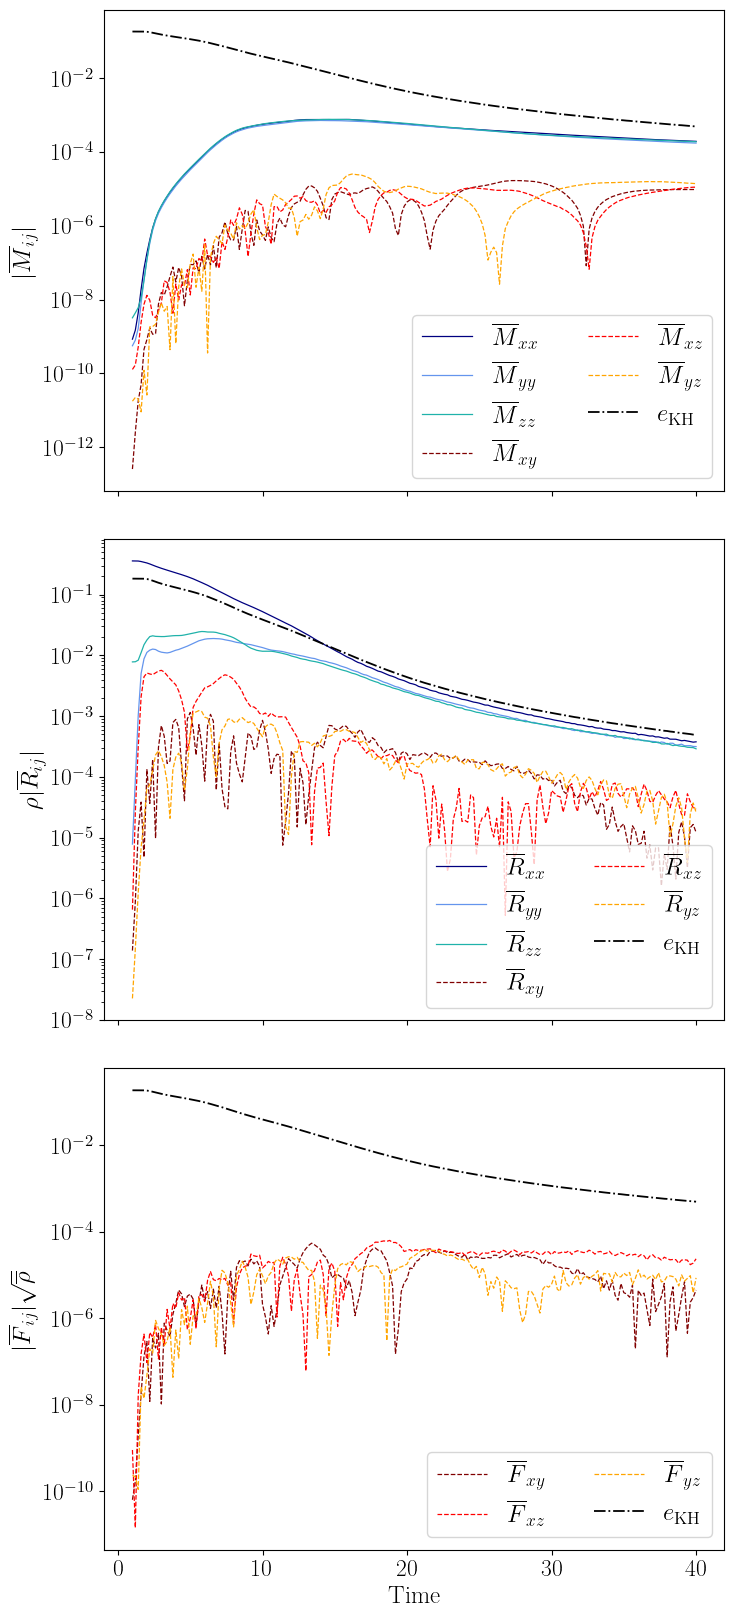

In [11]:
fig, ax = plt.subplots(3,1,sharex = 'all', sharey = 'none', figsize = (8,20))

for i in range(0,3):
    ax[i].tick_params(axis='y',labelsize = 17)
    ax[i].tick_params(axis='x',labelsize = 17)
    
plt.subplots_adjust(hspace = 0.1) 

colordiag = ['navy','cornflowerblue','lightseagreen']
colorndiag = ['maroon','red','orange']

ax[0].plot(t[5:],M1[5:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{M}_{xx}$')
ax[0].plot(t[5:],M1[5:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{M}_{yy}$')
ax[0].plot(t[5:],M1[5:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{M}_{zz}$')
ax[0].plot(t[5:],abs(M1[5:,1]), linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{M}_{xy}$')
ax[0].plot(t[5:],abs(M1[5:,2]), linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{M}_{xz}$')
ax[0].plot(t[5:],abs(M1[5:,4]), linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{M}_{yz}$')
ax[0].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[0].set_ylabel(r'$|\overline{M}_{ij}|$', fontsize = 18)
#ax[0].set_title(r'TEST', fontsize = 20)
ax[0].set_yscale('log')
ax[0].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[1].plot(t[5:],R1[5:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{R}_{xx}$')
ax[1].plot(t[5:],R1[5:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{R}_{yy}$')
ax[1].plot(t[5:],R1[5:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{R}_{zz}$')
ax[1].plot(t[5:],abs(R1[5:,1]), linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{R}_{xy}$')
ax[1].plot(t[5:],abs(R1[5:,2]), linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{R}_{xz}$')
ax[1].plot(t[5:],abs(R1[5:,4]), linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{R}_{yz}$')
ax[1].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[1].set_ylabel(r'$\rho|\overline{R}_{ij}|$', fontsize = 18)
ax[1].set_yscale('log')
ax[1].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[2].plot(t[5:],F1[5:,0], linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{F}_{xy}$')
ax[2].plot(t[5:],F1[5:,1], linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{F}_{xz}$')
ax[2].plot(t[5:],F1[5:,2], linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{F}_{yz}$')
ax[2].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[2].set_ylabel(r'$|\overline{F}_{ij}|\sqrt{\overline{\rho}}$', fontsize = 18)
ax[2].set_xlabel('Time', fontsize = 18)
ax[2].set_yscale('log')
ax[2].legend(loc = 'lower right', ncol = 2, fontsize = 18)

plt.savefig('/home/miquelmiravet/Desktop/figs_khi/stresses_KH-H1.pdf',bbox_inches = 'tight')

In [5]:
#plots stresses

t = np.linspace(0,400,201)
path_ult = 'res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global'


M1 = np.zeros((len(t),6))
R1 = np.zeros((len(t),6))
F1 = np.zeros((len(t),3))
eT1 = np.zeros(len(t))
rho1 = np.zeros(len(t))


for i,tt in enumerate(t):
    arx = format(int(tt), "04")
    M1[i], R1[i], F1[i], eT1[i], rho1[i] = readstresses(path_ult+'/stresses_sigma_r0_KHI-'+arx+'.h5')
    
M1trace = M1[:,0]+M1[:,3]+M1[:,5]

R1trace = R1[:,0]+R1[:,3]+R1[:,5]


for i in range(0,6):
    R1[:,i] = R1[:,i]*rho1[:]
    
    
R1trace[:] = R1trace[:]*rho1[:]


for i in range(0,3):
    F1[:,i] = abs(F1[:,i]*rho1**(0.5))
    

DATA FROM FILE:       res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0000.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 0.0  ms
DATA FROM FILE:       res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0002.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 0.2  ms
DATA FROM FILE:       res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0004.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma

F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 20.6  ms
DATA FROM FILE:       res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0208.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 20.8  ms
DATA FROM FILE:       res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0210.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 21.0  ms
DATA FROM FILE:       res_128_128_128/CVP--bx3e-4--128--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0212.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomea

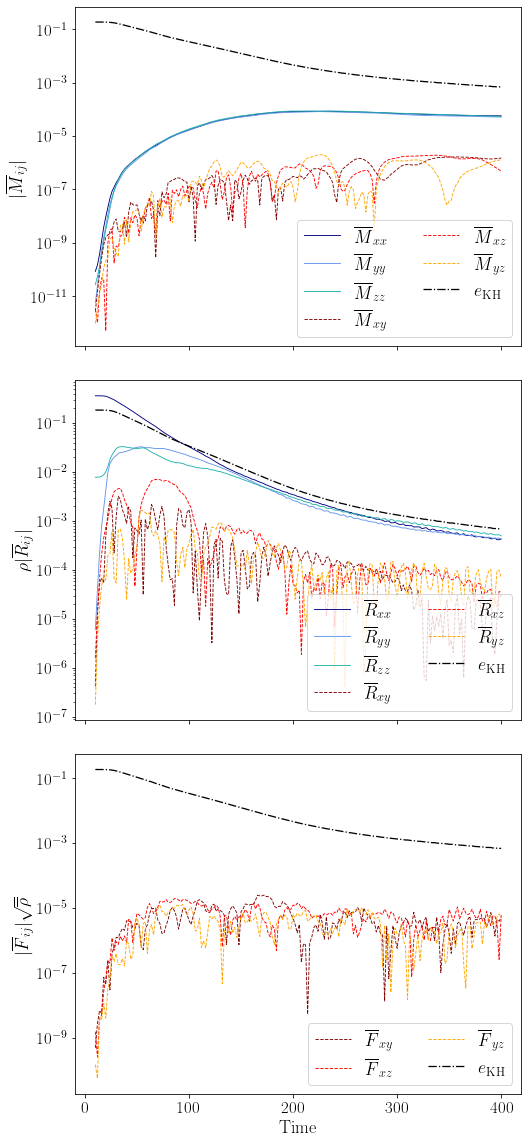

In [6]:
fig, ax = plt.subplots(3,1,sharex = 'all', sharey = 'none', figsize = (8,20))

for i in range(0,3):
    ax[i].tick_params(axis='y',labelsize = 17)
    ax[i].tick_params(axis='x',labelsize = 17)
    
plt.subplots_adjust(hspace = 0.1) 

colordiag = ['navy','cornflowerblue','lightseagreen']
colorndiag = ['maroon','red','orange']

ax[0].plot(t[5:],M1[5:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{M}_{xx}$')
ax[0].plot(t[5:],M1[5:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{M}_{yy}$')
ax[0].plot(t[5:],M1[5:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{M}_{zz}$')
ax[0].plot(t[5:],abs(M1[5:,1]), linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{M}_{xy}$')
ax[0].plot(t[5:],abs(M1[5:,2]), linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{M}_{xz}$')
ax[0].plot(t[5:],abs(M1[5:,4]), linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{M}_{yz}$')
ax[0].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[0].set_ylabel(r'$|\overline{M}_{ij}|$', fontsize = 18)
#ax[0].set_title(r'TEST', fontsize = 20)
ax[0].set_yscale('log')
ax[0].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[1].plot(t[5:],R1[5:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{R}_{xx}$')
ax[1].plot(t[5:],R1[5:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{R}_{yy}$')
ax[1].plot(t[5:],R1[5:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{R}_{zz}$')
ax[1].plot(t[5:],abs(R1[5:,1]), linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{R}_{xy}$')
ax[1].plot(t[5:],abs(R1[5:,2]), linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{R}_{xz}$')
ax[1].plot(t[5:],abs(R1[5:,4]), linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{R}_{yz}$')
ax[1].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[1].set_ylabel(r'$\rho|\overline{R}_{ij}|$', fontsize = 18)
ax[1].set_yscale('log')
ax[1].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[2].plot(t[5:],F1[5:,0], linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{F}_{xy}$')
ax[2].plot(t[5:],F1[5:,1], linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{F}_{xz}$')
ax[2].plot(t[5:],F1[5:,2], linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{F}_{yz}$')
ax[2].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[2].set_ylabel(r'$|\overline{F}_{ij}|\sqrt{\overline{\rho}}$', fontsize = 18)
ax[2].set_xlabel('Time', fontsize = 18)
ax[2].set_yscale('log')
ax[2].legend(loc = 'lower right', ncol = 2, fontsize = 18)


In [7]:
#plots stresses

t = np.linspace(0,400,201)
path_ult = 'res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global'


M1 = np.zeros((len(t),6))
R1 = np.zeros((len(t),6))
F1 = np.zeros((len(t),3))
eT1 = np.zeros(len(t))
rho1 = np.zeros(len(t))


for i,tt in enumerate(t):
    arx = format(int(tt), "04")
    M1[i], R1[i], F1[i], eT1[i], rho1[i] = readstresses(path_ult+'/stresses_sigma_r0_KHI-'+arx+'.h5')
    
M1trace = M1[:,0]+M1[:,3]+M1[:,5]

R1trace = R1[:,0]+R1[:,3]+R1[:,5]


for i in range(0,6):
    R1[:,i] = R1[:,i]*rho1[:]
    
    
R1trace[:] = R1trace[:]*rho1[:]


for i in range(0,3):
    F1[:,i] = abs(F1[:,i]*rho1**(0.5))
    

DATA FROM FILE:       res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0000.h5
Keys: <KeysViewHDF5 ['Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_M
sigma_R
sigma_rho
time
Time           : 0.0  ms
DATA FROM FILE:       res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0002.h5
Keys: <KeysViewHDF5 ['Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_M
sigma_R
sigma_rho
time
Time           : 0.2  ms
DATA FROM FILE:       res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0004.h5
Keys: <KeysViewHDF5 ['Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_M
sigma_R
sigma_rho
time
Time           : 0.4  ms
DATA FROM FILE:       res_256_256_256/CVP--bx3

Keys: <KeysViewHDF5 ['Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_M
sigma_R
sigma_rho
time
Time           : 20.0  ms
DATA FROM FILE:       res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0202.h5
Keys: <KeysViewHDF5 ['Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_M
sigma_R
sigma_rho
time
Time           : 20.200000000000003  ms
DATA FROM FILE:       res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0204.h5
Keys: <KeysViewHDF5 ['Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_M
sigma_R
sigma_rho
time
Time           : 20.400000000000002  ms
DATA FROM FILE:       res_256_256_256/CVP--bx3e-4--256--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0206.h5
Keys: <KeysView

In [8]:
fig, ax = plt.subplots(3,1,sharex = 'all', sharey = 'none', figsize = (8,20))

for i in range(0,3):
    ax[i].tick_params(axis='y',labelsize = 17)
    ax[i].tick_params(axis='x',labelsize = 17)
    
plt.subplots_adjust(hspace = 0.1) 

colordiag = ['navy','cornflowerblue','lightseagreen']
colorndiag = ['maroon','red','orange']

ax[0].plot(t[5:],M1[5:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{M}_{xx}$')
ax[0].plot(t[5:],M1[5:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{M}_{yy}$')
ax[0].plot(t[5:],M1[5:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{M}_{zz}$')
ax[0].plot(t[5:],abs(M1[5:,1]), linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{M}_{xy}$')
ax[0].plot(t[5:],abs(M1[5:,2]), linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{M}_{xz}$')
ax[0].plot(t[5:],abs(M1[5:,4]), linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{M}_{yz}$')
ax[0].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[0].set_ylabel(r'$|\overline{M}_{ij}|$', fontsize = 18)
#ax[0].set_title(r'TEST', fontsize = 20)
ax[0].set_yscale('log')
ax[0].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[1].plot(t[5:],R1[5:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{R}_{xx}$')
ax[1].plot(t[5:],R1[5:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{R}_{yy}$')
ax[1].plot(t[5:],R1[5:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{R}_{zz}$')
ax[1].plot(t[5:],abs(R1[5:,1]), linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{R}_{xy}$')
ax[1].plot(t[5:],abs(R1[5:,2]), linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{R}_{xz}$')
ax[1].plot(t[5:],abs(R1[5:,4]), linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{R}_{yz}$')
ax[1].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[1].set_ylabel(r'$\rho|\overline{R}_{ij}|$', fontsize = 18)
ax[1].set_yscale('log')
ax[1].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[2].plot(t[5:],F1[5:,0], linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{F}_{xy}$')
ax[2].plot(t[5:],F1[5:,1], linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{F}_{xz}$')
ax[2].plot(t[5:],F1[5:,2], linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{F}_{yz}$')
ax[2].plot(t[5:],eT1[5:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm KH}$')
ax[2].set_ylabel(r'$|\overline{F}_{ij}|\sqrt{\overline{\rho}}$', fontsize = 18)
ax[2].set_xlabel('Time', fontsize = 18)
ax[2].set_yscale('log')
ax[2].legend(loc = 'lower right', ncol = 2, fontsize = 18)


In [3]:
def readh5files(arxiv):

    print('DATA FROM FILE:      ',arxiv)

    with h5py.File(arxiv, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())
        for i in a_group_key:
            print(i)
        Fmean = f[a_group_key[1]][...]
        print('F stress shape    :', Fmean.shape)
        Fnew = np.array([Fmean[0,1],Fmean[0,2],Fmean[1,2]])
        Mmean = f[a_group_key[2]][...]
        print('M stress shape    :', Mmean.shape)
        Mnew = np.array([Mmean[0,0],Mmean[0,1], Mmean[0,2], Mmean[1,1], Mmean[1,2], Mmean[2,2]])
        Rmean = f[a_group_key[3]][...]
        print('R stress shape    :', Rmean.shape)
        Rnew = np.array([Rmean[0,0],Rmean[0,1], Rmean[0,2], Rmean[1,1], Rmean[1,2], Rmean[2,2]])
        rhomean = f[a_group_key[4]][...]
        print('filtered rho shape    :', rhomean.shape)
        sigmaF = f[a_group_key[5]][...]
        print('sigma F shape    :', sigmaF.shape)
        sFnew = np.array([sigmaF[0,1], sigmaF[0,2], sigmaF[1,2]])
        sigmaM = f[a_group_key[7]][...]
        print('sigma M shape    :', sigmaM.shape)
        sMnew = np.array([sigmaM[0,0],sigmaM[0,1],sigmaM[0,2],sigmaM[1,1],sigmaM[1,2],sigmaM[2,2]])
        sigmaR = f[a_group_key[8]][...]
        print('sigma R shape    :', sigmaR.shape)
        sRnew = np.array([sigmaR[0,0],sigmaR[0,1],sigmaR[0,2],sigmaR[1,1],sigmaR[1,2],sigmaR[2,2]])
        sigma_rho= f[a_group_key[9]][...]
        print('sigma rho shape    :', sigma_rho.shape)
        time = f[a_group_key[10]][...]
        print('time shape    :', time.shape)
        f.close()
    print('Time           =',time,' ms')
    
    return time, Mnew, Rnew, Fnew, sMnew, sRnew, sFnew, rhomean, sigma_rho
        
def energy_dens(Rtensor,rho):
     
    traceR = Rtensor[0]+Rtensor[3]+Rtensor[5]
    energyR = 0.5*rho*traceR

    return energyR

def error_propagation(rho,err_rho,M,err_M,R,err_R,F,err_F,lent):
    
    traceR = R[0]+R[3]+R[5]
    e_alphaR = np.zeros((6,lent))
    e_betaR = np.zeros((6,lent))
    e_gammaR = np.zeros((3,lent))

    for i in range(0,6):
        e_alphaR[i,:] = (err_M[i,:]/(0.5*rho[:]*traceR[:])**2+(M[i,:]/(0.5*traceR[:]*rho[:]**2))**2*err_rho[:]+(M[i,:]/(0.5*rho[:]*traceR[:]**2))**2*(err_R[0,:]+err_R[3,:]+err_R[5,:]))**(0.5)
        if i == 1 or i == 2 or i == 4: 
            e_betaR[i,:] = (err_R[i,:]/(0.5*traceR[:])**2+(R[i,:]/(0.5*traceR[:]**2))**2*(err_R[0,:]+err_R[3,:]+err_R[5,:]))**(0.5)
        elif i == 0:
            e_betaR[i,:] = (err_R[i,:]*(1/0.5*(1/traceR[:]-R[i,:]/traceR[:]**2))**2+(R[i,:]/(0.5*traceR[:]))**2*(err_R[3,:]+err_R[5,:]))**(0.5)
        elif i == 3:
            e_betaR[i,:] = (err_R[i,:]*(1/0.5*(1/traceR[:]-R[i,:]/traceR[:]**2))**2+(R[i,:]/(0.5*traceR[:]))**2*(err_R[0,:]+err_R[5,:]))**(0.5)
        elif i == 5:
            e_betaR[i,:] = (err_R[i,:]*(1/0.5*(1/traceR[:]-R[i,:]/traceR[:]**2))**2+(R[i,:]/(0.5*traceR[:]))**2*(err_R[3,:]+err_R[0,:]))**(0.5)
    for j in range(0,3):        
        e_gammaR[j] = (err_F[j,:]/(0.5*rho[:]**(0.5)*traceR[:])**2+(F[j,:]/(0.25*rho[:]**(-1.5)*traceR[:]))**2*err_rho[:]+(F[j,:]/(0.5*rho[:]**(0.5)*traceR[:]**2))**2*(err_R[0,:]+err_R[3,:]+err_R[5,:]))**(0.5)
    
    return e_alphaR, e_betaR, e_gammaR

In [4]:
ind_ini = 100
ind_fin = 201
told = np.linspace(0,40,201)
#told = told[:-1]
#t = told[1:]
tsat = told[ind_ini:ind_fin]

    
#stress tensors:
path = 'res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/'
        
F = np.zeros((3,len(told)))
M = np.zeros((6,len(told)))
R = np.zeros((6,len(told)))
sigmaF = np.zeros((3,len(told)))
sigmaM = np.zeros((6,len(told)))
sigmaR = np.zeros((6,len(told)))
rho = np.zeros(len(told))
sigmarho = np.zeros(len(told))

for x,tt in enumerate(told):
    arx = format(int(10*tt), "04")
    files = 'stresses_sigma_r0_KHI-'+str(arx)+'.h5'
            
    listvar = readh5files(path+files)

    M[:,x] = listvar[1]
    R[:,x] = listvar[2]
    F[:,x] = listvar[3]
    sigmaM[:,x] = listvar[4]
    sigmaR[:,x] = listvar[5]
    sigmaF[:,x] = listvar[6]
    rho[x] = listvar[7]
    sigmarho[x] = listvar[8]

Fsat = F[:,ind_ini:ind_fin]
Msat = M[:,ind_ini:ind_fin]
Rsat = R[:,ind_ini:ind_fin]
sigmaFsat = sigmaF[:,ind_ini:ind_fin]
sigmaMsat = sigmaM[:,ind_ini:ind_fin]
sigmaRsat = sigmaR[:,ind_ini:ind_fin]
rhosat = rho[ind_ini:ind_fin]
sigmarhosat = sigmarho[ind_ini:ind_fin]

energyR = energy_dens(R[:,1:],rho[1:])
energyRsat = energy_dens(Rsat,rhosat)
        
    #constants:

alphaR = M[:,1:]/energyR
betaR = rho[1:]*R[:,1:]/energyR
gammaR = (rho[1:])**(0.5)*F[:,1:]/energyR
alphaRsat = Msat[:]/energyRsat
betaRsat = rhosat*Rsat[:]/energyRsat
gammaRsat = (rhosat)**(0.5)*Fsat[:]/energyRsat

    #errors:
        
e_alphaR, e_betaR, e_gammaR = error_propagation(rho[1:],sigmarho[1:],M[:,1:],sigmaM[:,1:],R[:,1:],sigmaR[:,1:],F[:,1:],sigmaF[:,1:],len(told[1:]))
e_alphaRsat, e_betaRsat, e_gammaRsat = error_propagation(rhosat,sigmarhosat,Msat,sigmaMsat,Rsat,sigmaRsat,Fsat,sigmaFsat,len(tsat))
        
    #averages: 
            
alpha_av = np.sum(alphaR/e_alphaR**2, axis = 1)/np.sum(1/e_alphaR**2, axis = 1)
beta_av = np.sum(betaR/e_betaR**2, axis = 1)/np.sum(1/e_betaR**2, axis = 1)
gamma_av = np.sum(gammaR/e_gammaR**2, axis = 1)/np.sum(1/e_gammaR**2, axis = 1)

alpha_avsat = np.sum(alphaRsat/e_alphaRsat**2, axis = 1)/np.sum(1/e_alphaRsat**2, axis = 1)
beta_avsat = np.sum(betaRsat/e_betaRsat**2, axis = 1)/np.sum(1/e_betaRsat**2, axis = 1)
gamma_avsat = np.sum(gammaRsat/e_gammaRsat**2, axis = 1)/np.sum(1/e_gammaRsat**2, axis = 1)


err_av_alpha = (1/np.sum(1/e_alphaR**2,axis = 1))**(0.5)
err_av_beta = (1/np.sum(1/e_betaR**2,axis = 1))**(0.5)
err_av_gamma = (1/np.sum(1/e_gammaR**2,axis = 1))**(0.5)

err_av_alphasat = (1/np.sum(1/e_alphaRsat**2,axis = 1))**(0.5)
err_av_betasat = (1/np.sum(1/e_betaRsat**2,axis = 1))**(0.5)
err_av_gammasat = (1/np.sum(1/e_gammaRsat**2,axis = 1))**(0.5)

std_alpha = np.std(alphaR, axis = 1)
std_beta = np.std(betaR, axis = 1)
std_gamma = np.std(gammaR, axis = 1)

std_alphasat = np.std(alphaRsat, axis = 1)
std_betasat = np.std(betaRsat, axis = 1)
std_gammasat = np.std(gammaRsat, axis = 1)

err_tot_alpha = np.sqrt(std_alpha**2+err_av_alpha**2)
err_tot_beta = np.sqrt(std_beta**2+err_av_beta**2)
err_tot_gamma = np.sqrt(std_gamma**2+err_av_gamma**2)

err_tot_alphasat = np.sqrt(std_alphasat**2+err_av_alphasat**2)
err_tot_betasat = np.sqrt(std_betasat**2+err_av_betasat**2)
err_tot_gammasat = np.sqrt(std_gammasat**2+err_av_gammasat**2)


DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0000.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
F stress shape    : (3, 3)
M stress shape    : (3, 3)
R stress shape    : (3, 3)
filtered rho shape    : ()
sigma F shape    : (3, 3)
sigma M shape    : (3, 3)
sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [0.]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0002.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
F stress shape    : (3, 3)
M stress shape    : (3, 3)
R stress shape    : (3, 3)


sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [12.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0128.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
F stress shape    : (3, 3)
M stress shape    : (3, 3)
R stress shape    : (3, 3)
filtered rho shape    : ()
sigma F shape    : (3, 3)
sigma M shape    : (3, 3)
sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [12.8]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0130.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sig

sigma F shape    : (3, 3)
sigma M shape    : (3, 3)
sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [25.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0258.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
F stress shape    : (3, 3)
M stress shape    : (3, 3)
R stress shape    : (3, 3)
filtered rho shape    : ()
sigma F shape    : (3, 3)
sigma M shape    : (3, 3)
sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [25.8]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0260.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fm

sigma M shape    : (3, 3)
sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [38.6]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0388.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
F stress shape    : (3, 3)
M stress shape    : (3, 3)
R stress shape    : (3, 3)
filtered rho shape    : ()
sigma F shape    : (3, 3)
sigma M shape    : (3, 3)
sigma R shape    : (3, 3)
sigma rho shape    : ()
time shape    : (1,)
Time           = [38.8]  ms
DATA FROM FILE:       res_512_512_512/CVP--bx3e-4--512--rndom/stress_tensors_global/stresses_sigma_r0_KHI-0390.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
rhomean
si

In [5]:
fig, axs = plt.subplots(1,2,sharex = 'all',sharey = False, figsize = (12,4))
plt.subplots_adjust(hspace = 0.1,wspace = 0.3)
    
    #fig.tight_layout(pad=1.0)
#t = np.linspace(0,40,201)
#t= t[ind_ini:]    

t = tsat
alphaR = alphaRsat
betaR = betaRsat
gammaR = gammaRsat
e_alphaR = e_alphaRsat
e_betaR = e_betaRsat
e_gammaR = e_gammaRsat


ax1 = axs[0]
ax3 = axs[1]
    
ax1.tick_params(axis='x',labelsize = 18)   
ax3.tick_params(axis='x',labelsize = 18)
ax1.tick_params(axis='y',labelsize = 18)
ax3.tick_params(axis='y',labelsize = 18)
        
ax1.plot(t, alphaR[0,:], linestyle = 'solid', color = 'darkorchid', label = r'$\alpha_{\rm{R},xx}$')
ax1.fill_between(t, alphaR[0,:]-e_alphaR[0,:], alphaR[0,:]+e_alphaR[0,:], color = 'darkorchid', alpha = 0.2)
ax1.plot(t, alphaR[3,:], linestyle = 'dashed' , color = 'darkcyan', label = r'$\alpha_{\rm{R},yy}$')
ax1.fill_between(t, alphaR[3,:]-e_alphaR[3,:], alphaR[3,:]+e_alphaR[3,:], color='darkcyan', alpha = 0.2)
ax1.plot(t, alphaR[5,:], linestyle = 'dotted', color = 'darkorange', label = r'$\alpha_{\rm{R},zz}$')
ax1.fill_between(t, alphaR[5,:]-e_alphaR[5,:], alphaR[5,:]+e_alphaR[5,:], color='darkorange', alpha = 0.2)
ax1.set_xlabel('Time', fontsize = 20)
ax1.set_ylabel(r'$\alpha_{ij}$', fontsize = 20)
ax1.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
#ax1.set_yscale('log')
#ax1.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
#ax1.set_xlim([13,30])
    
ax3.plot(t, betaR[0,:], linestyle = 'solid', color = 'darkorchid', label = r'$xx$')
ax3.fill_between(t, betaR[0,:]-e_betaR[0,:], betaR[0,:]+e_betaR[0,:], color = 'darkorchid', alpha = 0.2)
ax3.plot(t, betaR[3,:], linestyle = 'dashed' , color = 'darkcyan', label = r'$yy$')
ax3.fill_between(t, betaR[3,:]-e_betaR[3,:], betaR[3,:]+e_betaR[3,:], color='darkcyan', alpha = 0.2)
ax3.plot(t, betaR[5,:], linestyle = 'dotted', color = 'darkorange', label = r'$zz$')
ax3.fill_between(t, betaR[5,:]-e_betaR[5,:], betaR[5,:]+e_betaR[5,:], color='darkorange', alpha = 0.2)
ax3.set_xlabel('Time', fontsize = 20)
ax3.set_ylabel(r'$\beta_{ij}$', fontsize = 20)
ax3.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
ax3.legend(bbox_to_anchor=(1.4,0.7), ncol = 1, frameon = 'True',prop={"size":19})
#ax3.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
plt.savefig('/home/miquelmiravet/Desktop/figs_khi/diag-coeffs_KHI-H3--late.pdf',bbox_inches='tight')

   
fig, ax = plt.subplots(1,3,sharex = 'all',sharey = False, figsize = (18,4))
plt.subplots_adjust(hspace = 0.1,wspace = 0.3)
    
ax2 = ax[0]
ax4 = ax[1]
ax5 = ax[2]
    
ax5.tick_params(axis='x',labelsize = 18)
ax2.tick_params(axis='x',labelsize = 18)
ax4.tick_params(axis='x',labelsize = 18)
ax2.tick_params(axis='y',labelsize = 18)
ax4.tick_params(axis='y',labelsize = 18)
ax5.tick_params(axis='y',labelsize = 18)

ax5.plot(t, gammaR[1,:], linestyle = 'solid', color = 'darkorchid', label = r'$xz$')
ax5.fill_between(t, gammaR[1,:]-e_gammaR[1,:], gammaR[1,:]+e_gammaR[1,:], color='darkorchid', alpha = 0.2)
ax5.plot(t, gammaR[0,:], linestyle = 'dashed', color = 'darkcyan', label = r'$xy$')
ax5.fill_between(t, gammaR[0,:]-e_gammaR[0,:], gammaR[0,:]+e_gammaR[0,:], color = 'darkcyan', alpha = 0.2)
ax5.plot(t, gammaR[2,:], linestyle = 'dotted', color = 'darkorange', label = r'$yz$')
ax5.fill_between(t, gammaR[2,:]-e_gammaR[2,:], gammaR[2,:]+e_gammaR[2,:], color='darkorange', alpha = 0.2)
#ax5.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)

ax2.plot(t, alphaR[2,:], linestyle = 'solid', color = 'darkorchid', label = r'$\alpha_{\rm{R},xz}$')
ax2.fill_between(t, alphaR[2,:]-e_alphaR[2,:], alphaR[2,:]+e_alphaR[2,:], color='darkorchid', alpha = 0.2)
ax2.plot(t, alphaR[1,:], linestyle = 'dashed', color = 'darkcyan', label = r'$\alpha_{\rm{R},xy}$')
ax2.fill_between(t, alphaR[1,:]-e_alphaR[1,:], alphaR[1,:]+e_alphaR[1,:], color='darkcyan', alpha = 0.2)
ax2.plot(t, alphaR[4,:], linestyle = 'dotted', color = 'darkorange', label = r'$\alpha_{\rm{R},yz}$')
ax2.fill_between(t, alphaR[4,:]-e_alphaR[4,:], alphaR[4,:]+e_alphaR[4,:], color='darkorange', alpha = 0.2)
#ax2.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)
#ax2.set_ylim([-2,-2.5])
#ax2.set_xlim([13,30])
    
ax4.plot(t, betaR[2,:], linestyle = 'solid', color = 'darkorchid', label = r'$\beta_{\rm{R},rxz}$')
ax4.fill_between(t, betaR[2,:]-e_betaR[2,:], betaR[2,:]+e_betaR[2,:], color='darkorchid', alpha = 0.2)
ax4.plot(t, betaR[1,:], linestyle = 'dashed', color = 'darkcyan', label = r'$\beta_{\rm{R},xy}$')
ax4.fill_between(t, betaR[1,:]-e_betaR[1,:], betaR[1,:]+e_betaR[1,:], color='darkcyan', alpha = 0.2)
ax4.plot(t, betaR[4,:], linestyle = 'dotted', color = 'darkorange', label = r'$\beta_{\rm{R},yz}$')
ax4.fill_between(t, betaR[4,:]-e_betaR[4,:], betaR[4,:]+e_betaR[4,:], color='darkorange', alpha = 0.2)
#ax4.axvline(11,color='grey',linestyle='dashed',linewidth=1.5)

ax2.set_xlabel('Time', fontsize = 20)
ax2.set_ylabel(r'$\alpha_{ij}$', fontsize = 20)
#ax2.set_ylim((2,-1))
ax2.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
ax4.set_xlabel('Time', fontsize = 20)
ax4.set_ylabel(r'$\beta_{ij}$', fontsize = 20)
#ax2.set_ylim((2,-1))
ax4.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
ax5.set_xlabel('Time', fontsize = 20)
ax5.set_ylabel(r'$\gamma_{ij}$',fontsize = 20)
ax5.hlines(y = 0, xmin = t[0], xmax = t[-1], linestyle = 'solid', color = 'black', alpha = 0.4 )
#plt.yscale('symlog')
ax5.legend(bbox_to_anchor=(1.45,0.7), ncol = 1, frameon = 'True',prop={"size":20})

#plt.savefig('/home/miquelmiravet/Desktop/figs_khi/non-diag-coeffs_KHI-H3--late.pdf',bbox_inches='tight')

In [12]:
coord = ['xx','xy','xz','yy','yz','zz']

for i in range(0,6):
    print('alpha_ %s = %.6f +- %.6f'%(coord[i],alpha_avsat[i],err_tot_alphasat[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.6f +- %.6f'%(coord[i],beta_avsat[i],err_tot_betasat[i]))
print('*'*60)

coord2 =['xy','xz','yz']
    
for i in range(0,3):
    print('gamma_ %s = %.6f +- %.6f'%(coord2[i],gamma_avsat[i],err_tot_gammasat[i]))
print('*'*60)  

alpha_ xx = 0.222093 +- 0.089387
alpha_ xy = -0.001322 +- 0.028963
alpha_ xz = 0.000554 +- 0.029017
alpha_ yy = 0.211906 +- 0.077192
alpha_ yz = -0.007328 +- 0.028491
alpha_ zz = 0.219166 +- 0.085152
************************************************************
beta_ xx = 0.786094 +- 0.068013
beta_ xy = -0.051449 +- 0.080019
beta_ xz = -0.037169 +- 0.078456
beta_ yy = 0.618253 +- 0.059801
beta_ yz = -0.074064 +- 0.065165
beta_ zz = 0.597312 +- 0.062303
************************************************************
gamma_ xy = 0.010882 +- 0.051993
gamma_ xz = -0.024880 +- 0.054474
gamma_ yz = -0.000874 +- 0.048329
************************************************************


In [16]:
coord = ['xx','xy','xz','yy','yz','zz']
print("H1")
print("="*60)
for i in range(0,6):
    print('alpha_ %s = %.6f +- %.6f'%(coord[i],alpha_avsat[i],err_av_alphasat[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.6f +- %.6f'%(coord[i],beta_avsat[i],err_av_betasat[i]))
print('*'*60)

coord2 =['xy','xz','yz']
    
for i in range(0,3):
    print('gamma_ %s = %.6f +- %.6f'%(coord2[i],gamma_avsat[i],err_av_gammasat[i]))
print('*'*60)  

H1
alpha_ xx = 0.222093 +- 0.045646
alpha_ xy = -0.001322 +- 0.027142
alpha_ xz = 0.000554 +- 0.027790
alpha_ yy = 0.211906 +- 0.043415
alpha_ yz = -0.007328 +- 0.026645
alpha_ zz = 0.219166 +- 0.046282
************************************************************
beta_ xx = 0.786094 +- 0.064228
beta_ xy = -0.051449 +- 0.070425
beta_ xz = -0.037169 +- 0.068940
beta_ yy = 0.618253 +- 0.058393
beta_ yz = -0.074064 +- 0.061041
beta_ zz = 0.597312 +- 0.057869
************************************************************
gamma_ xy = 0.010882 +- 0.051722
gamma_ xz = -0.024880 +- 0.053075
gamma_ yz = -0.000874 +- 0.047311
************************************************************


In [19]:
coord = ['xx','xy','xz','yy','yz','zz']
print("H3")
print("="*60)
for i in range(0,6):
    print('alpha_ %s = %.6f +- %.6f'%(coord[i],alpha_avsat[i],err_av_alphasat[i]))
print('*'*60)
for i in range(0,6):
    print('beta_ %s = %.6f +- %.6f'%(coord[i],beta_avsat[i],err_av_betasat[i]))
print('*'*60)

coord2 =['xy','xz','yz']
    
for i in range(0,3):
    print('gamma_ %s = %.6f +- %.6f'%(coord2[i],gamma_avsat[i],err_av_gammasat[i]))
print('*'*60)  

H3
alpha_ xx = 1.080053 +- 0.190302
alpha_ xy = 0.000085 +- 0.061623
alpha_ xz = -0.028174 +- 0.060721
alpha_ yy = 0.295428 +- 0.061079
alpha_ yz = -0.007497 +- 0.036091
alpha_ zz = 0.328957 +- 0.067907
************************************************************
beta_ xx = 1.650427 +- 0.037669
beta_ xy = -0.022131 +- 0.055117
beta_ xz = -0.101352 +- 0.059740
beta_ yy = 0.157016 +- 0.024631
beta_ yz = -0.005631 +- 0.019349
beta_ zz = 0.189251 +- 0.028666
************************************************************
gamma_ xy = 0.000030 +- 0.065433
gamma_ xz = 0.014303 +- 0.072253
gamma_ yz = -0.001858 +- 0.025556
************************************************************
